In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [2]:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file
print(df.head())
#Hint: read_csv(), head()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [198]:
#b) 
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

cols = df.columns


house_numerical_df = df._get_numeric_data().columns
house_categorical_df = list(set(cols) - set(house_numerical_df))

print(house_categorical_df)
print(house_numerical_df)


['date']
Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [199]:
# c) Compute basic statistics of numerical variables. 
#Your code:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

print(df.describe())
#Hint: Function describe()


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

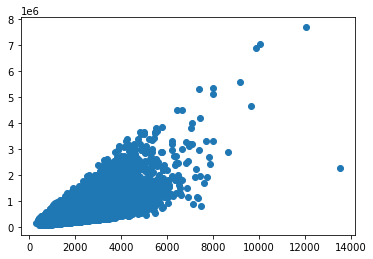

In [200]:
#a) Show the relation of square footage and price.  
#Your code:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

fig, ax = plt.subplots()

square = df["sqft_living"]
price = df["price"]

ax.scatter(square, price)
plt.show()

#Hint plt.scatter

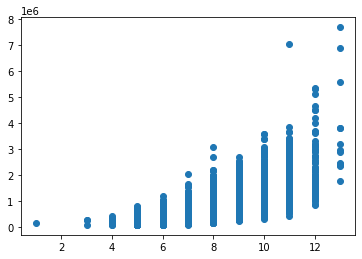

In [201]:
#b) Check how price is influenced by apartment's grade. Find other variables correlated with price.
#Your code:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

fig, ax = plt.subplots()

grade = df["grade"]
price = df["price"]

ax.scatter(grade, price)
plt.show()


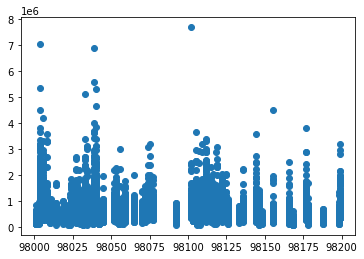

In [202]:
#c) Check how good apartments are distributed over the city. 
# First, plot zipcode versus price. 
#Your code:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

fig, ax = plt.subplots()

zipcode = df["zipcode"]
price = df["price"]

ax.scatter(zipcode, price)
plt.show()


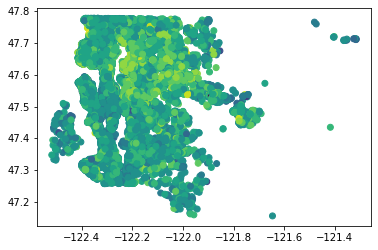

In [203]:
# Then, use apartments coordinates (longitude and lattitude) in order to show 
# where apartments of good grade are located.
#Your code:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

fig, ax = plt.subplots()

longitude = df["long"]
lattitude = df["lat"]
grade = df.loc[:,"grade"]



ax.scatter(longitude, lattitude, c=grade)

plt.show()



## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

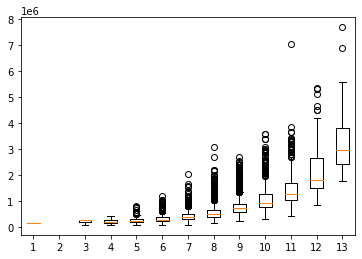

In [6]:
#a)Create boxplot of apartment's grade versus it's price. Compare with plot 2b).
#Your code:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

grade = []
for i in range(1,14):
    grade.append(df.loc[lambda df: df['grade'] == i]["price"])


plt.boxplot(x = grade, data = price)



plt.show()

#Hint: plt.boxplot

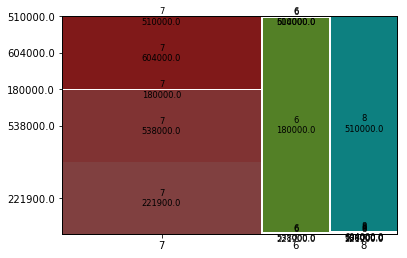

In [205]:
#b)Create mosaic plot of any two categorical variables.
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
mosaic(data = df.head(), index = ["grade", "price"])
plt.show()


## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [206]:
#a)Compute the basic statistics of apartments fulfilling above constraints.
#Your code:
df = pd.read_csv(getcwd() + "\kc_house_data.csv") # need to be __main__ file

ex4_df = df.loc[(df['bedrooms'] == 3.0) & (df['bathrooms'] == 2.0) & (df['floors'] == 2.0)]

ex4_df.describe()

#Hint: pandas.DataFrame.loc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


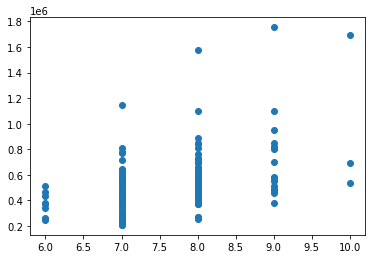

In [207]:
#b)Distinct accepted apartments on any of previously created plots.
#Your code:

grade = ex4_df["grade"]
price = ex4_df["price"]

plt.scatter(grade, price)
plt.show()



In [208]:
#c)Find such apartments with best price to footage ratio.
#Your code:
sort_condition = (ex4_df.loc[:,"price"] / ex4_df.loc[:,"sqft_living"]).sort_values().index
ex4_df.loc[sort_condition, :].head()

#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,6,2710,0,1951,0,98126,47.5188,-122.373,850,5000
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,9,3020,90,1999,0,98058,47.4343,-122.082,2150,44967
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,7,1580,0,2006,0,98042,47.3338,-122.053,2280,5000
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,8,1810,0,1987,0,98058,47.4619,-122.153,2140,9657
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,7,1936,0,2014,0,98001,47.2602,-122.246,1620,21600
